In [1]:
import pandas as pd
import warnings
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Nettoyage

Import & concatenation des données

In [ ]:
df=pd.read_csv('2016_01.csv')

for i in range(2,13):
    if len(str(i))==1 :
        i='0'+str(i)
    csv = '2016_'+str(i)+'.csv'
    df_temp=pd.read_csv(csv,on_bad_lines='skip')
    df=pd.concat([df,df_temp], axis=0)
    print(df.shape)

Observation des valeurs nulles

In [ ]:
msno.matrix(df.sample(frac=0.5))

On voit beaucoup de valeurs nulles dans certaines colonnes

In [ ]:
df.dropna(thresh=0.8*len(df),axis=1,inplace=True)

On décide de retirer plus simplement tous les nulles, car présents en faibles quantités et sur les mêmes lignes

In [ ]:
df=df.dropna(axis=1, how='all')

On décide de filtrer uniquement les vols non annulés et non détournés

In [ ]:
df = df.loc[(df['CANCELLED']==0)|(df['DIVERTED']==0)]

In [ ]:
df.to_pickle('df.pickle')

## Visualisation

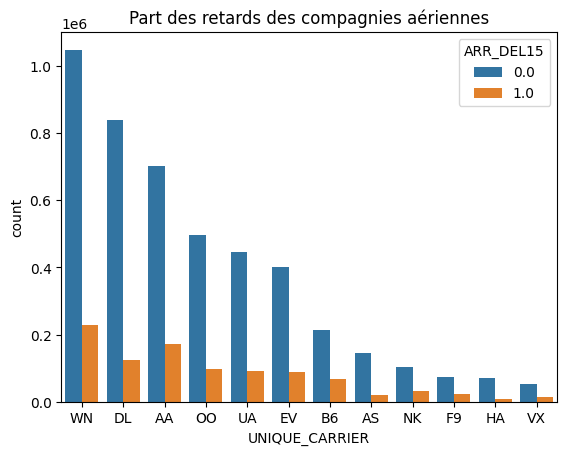

In [3]:
sns.countplot(data=df,x='UNIQUE_CARRIER',hue='ARR_DEL15',order = df['UNIQUE_CARRIER'].value_counts().index)
plt.title('Part des retards des compagnies aériennes')
plt.show()

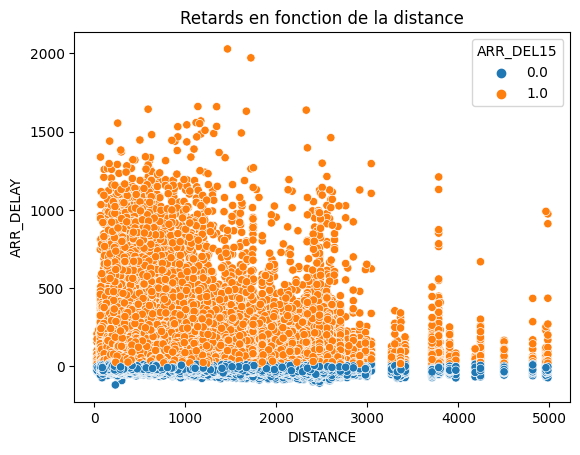

In [4]:
sns.scatterplot(data=df.sample(frac=0.5),x='DISTANCE',y='ARR_DELAY',hue='ARR_DEL15')
plt.title('Retards en fonction de la distance')
plt.show()